In [9]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

In [10]:
df = pd.read_csv("Copy of Stacked Trauma data.csv")
df2 = pd.read_csv("Original_download_TA_2017_refactored.csv")
df3 = pd.read_csv("refined2.csv")
copy_stack = list(df)
original_stack = list(df2)
copy_stack

['T1#',
 'Medical Record Number',
 'ED/Hosp Arrival Date',
 'Date of Birth',
 'Age + Units',
 'Age',
 'Units of Age',
 'Gender',
 'Levels',
 'Co-morbid 1',
 'Co-morbid 2',
 'ICD-10 E-code #1',
 'Trauma Type',
 'Report of physical abuse?',
 'Injury Comments',
 'Airbag Deployment',
 'Patient Position in Vehicle',
 'Safet Equipment Issues',
 'Child Restraint',
 'MV Speed',
 'Fall Height',
 'Transport Mode',
 'SBP',
 'Pulse',
 'RR',
 'GCS',
 'Intubated < Vitals?',
 'Arrived From',
 'ED LOS (mins)',
 'Dispositon from  ED',
 'Final Outcome-Dead or Alive',
 'Discharge Disposition',
 'GCS Total',
 'Total Days in ICU',
 'Admission Hosp LOS (days)',
 'Treatment/Intervention',
 'Total LOS (ED+Admit)',
 'Time to 1st OR Visit (mins.)',
 'Injury Severity Score',
 'AIS 2005',
 'AIS 2005 Body Part',
 'AIS 2005 Severity',
 'ICD10 Dx Code',
 'Consulting Service',
 'Procedure Performed (ICD10 Code)',
 'Location',
 'Service',
 'Anesthesia Start Time',
 'Time to Proc (ED Arrival) Min']

In [11]:
list(df3)


['T1#',
 'Medical Record Number',
 'ED/Hosp Arrival Date',
 'Date of Birth',
 'Age + Units',
 'Age',
 'Units of Age',
 'Gender',
 'Levels',
 'Co-morbid 1',
 'Co-morbid 2',
 'ICD-10 E-code #1',
 'Trauma Type',
 'Report of physical abuse?',
 'Injury Comments',
 'Airbag Deployment',
 'Patient Position in Vehicle',
 'Safet Equipment Issues',
 'Child Restraint',
 'MV Speed',
 'Fall Height',
 'Transport Mode',
 'SBP',
 'Pulse',
 'RR',
 'GCS',
 'Intubated < Vitals?',
 'Arrived From',
 'ED LOS (mins)',
 'Dispositon from  ED',
 'Final Outcome-Dead or Alive',
 'Discharge Disposition',
 'GCS Total',
 'Total Days in ICU',
 'Admission Hosp LOS (days)',
 'Treatment/Intervention',
 'Total LOS (ED+Admit)',
 'Time to 1st OR Visit (mins.)',
 'Injury Severity Score',
 'AIS 2005',
 'AIS 2005 Body Part',
 'AIS 2005 Severity',
 'ICD10 Dx Code',
 'Consulting Service',
 'Procedure Performed (ICD10 Code)',
 'Location',
 'Service',
 'Anesthesia Start Time',
 'Time to Proc (ED Arrival) Min']

In [12]:
print("copy stack len", len(copy_stack))
print("original stack len", len(original_stack))
# Check which copy columns exist in the original stack
np.in1d(copy_stack,original_stack)

copy stack len 49
original stack len 54


array([False, False, False, False,  True,  True, False,  True,  True,
       False, False, False,  True,  True, False, False,  True, False,
       False,  True,  True,  True,  True,  True,  True,  True,  True,
       False, False, False,  True,  True,  True,  True,  True, False,
       False,  True,  True, False,  True,  True,  True,  True,  True,
        True,  True, False,  True], dtype=bool)

In [13]:
# Check which original_stack columns exist in the copy stack
np.in1d(original_stack, copy_stack)

array([ True,  True,  True, False, False,  True, False, False, False,
        True,  True, False,  True,  True, False,  True,  True,  True,
        True,  True,  True, False, False, False, False, False,  True,
        True, False, False, False, False, False,  True, False, False,
        True,  True,  True,  True,  True,  True,  True,  True,  True,
       False,  True,  True,  True,  True, False, False, False, False], dtype=bool)

In [14]:
df3.dtypes

T1#                                  int64
Medical Record Number                int64
ED/Hosp Arrival Date                 int64
Date of Birth                       object
Age + Units                         object
Age                                  int64
Units of Age                        object
Gender                              object
Levels                               int64
Co-morbid 1                         object
Co-morbid 2                         object
ICD-10 E-code #1                    object
Trauma Type                         object
Report of physical abuse?           object
Injury Comments                     object
Airbag Deployment                   object
Patient Position in Vehicle         object
Safet Equipment Issues              object
Child Restraint                     object
MV Speed                            object
Fall Height                         object
Transport Mode                       int64
SBP                                 object
Pulse      

In [15]:
# plt.matshow(df.corr())
# plt.show()
import seaborn as sns

df_new = df3
def splitColumn(dataframe, type, colPrefix):
    if colPrefix != None:
        df_dummies = pd.get_dummies(dataframe[type], prefix=colPrefix)
    else:
        df_dummies = pd.get_dummies(dataframe[type])
    dataframe = pd.concat([dataframe, df_dummies], axis=1)
    del dataframe[type]
    return dataframe
# TODO: Refactor this. Just use an array.
df_new = splitColumn(df_new, 'Trauma Type', None)
df_new = splitColumn(df_new, 'Levels', 'Trauma Category')
df_new.dropna
# df_new = splitColumn(df_new, 'Transport Mode', None
# df_new = removeType(df_new, 'Gender')


# Clean the data (remove )
def removeRows(dataframe, columnArray, removalValues):
    modified_df = dataframe
    for i in range(len(columnArray)):
        for j in range(len(removalValues)):
            modified_df = modified_df[modified_df[columnArray[i]].str.contains(removalValues[j]) == False]
    return modified_df

df_new = removeRows(df_new, ['Injury Severity Score', 'GCS'], ['NA', 'BL', 'ND'])

df_new[['Injury Severity Score','GCS']] = df_new[['Injury Severity Score','GCS']].apply(pd.to_numeric)
df_new

,T1#,Medical Record Number,ED/Hosp Arrival Date,Date of Birth,Age + Units,Age,Units of Age,Gender,Co-morbid 1,Co-morbid 2,...,Service,Anesthesia Start Time,Time to Proc (ED Arrival) Min,*BL,*NA,Blunt,Burn,Penetrating,Trauma Category_1,Trauma Category_2
1,18137,5931015,42371,40736,4 Y,4,Y,M,*NA,*BL,...,*BL,0.036805556,14,0,0,1,0,0,0,1
2,18137,5931015,42371,40736,4 Y,4,Y,M,*NA,*BL,...,Pediatric Surgery,0.721527778,2440,0,0,1,0,0,0,1
3,18137,5931015,42371,40736,4 Y,4,Y,M,*NA,*BL,...,*BL,0.456944444,3499,0,0,1,0,0,0,1
4,18137,5931015,42371,40736,4 Y,4,Y,M,*NA,*BL,...,NaN,NaN,NaN,0,0,1,0,0,0,1
5,18137,5931015,42371,40736,4 Y,4,Y,M,*NA,*BL,...,NaN,NaN,NaN,0,0,1,0,0,0,1
7,18138,5932288,42371,40736,4 Y,4,Y,M,*ND,*BL,...,*BL,0.0625,21,0,0,1,0,0,1,0
8,18138,5932288,42371,40736,4 Y,4,Y,M,*ND,*BL,...,*BL,0.0625,21,0,0,1,0,0,1,0
9,18138,5932288,42371,40736,4 Y,4,Y,M,*ND,*BL,...,Pediatric Surgery,0.120833333,105,0,0,1,0,0,1,0
10,18138,5932288,42371,40736,4 Y,4,Y,M,*ND,*BL,...,Pediatric Surgery,0.059027778,16,0,0,1,0,0,1,0
11,18138,5932288,42371,40736,4 Y,4,Y,M,*ND,*BL,...,Pediatric Surgery,0.120833333,105,0,0,1,0,0,1,0


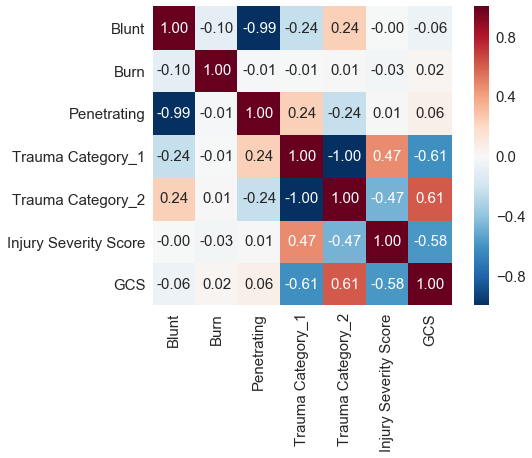

In [16]:
# - Create a correlation matrix to quantify the linear relationships between features.
# In[3]:
import numpy as np
cols = ['Blunt', 'Burn', 'Penetrating', 'Trauma Category_1', 'Trauma Category_2', 'Injury Severity Score', 'GCS']
cor_matrix = np.corrcoef(df_new[cols].values.T) # note we transpose to get the data by columns. Columns become rows.
sns.set(font_scale=1.5)
cor_heat_map = sns.heatmap(cor_matrix,
cbar=True,
annot=True,
square=True,
fmt='.2f',
annot_kws={'size':15},
yticklabels=cols,
xticklabels=cols)
plt.show()